# Exploratory Data Analysis of Customer Segmentation and marketing campaigns #


## Importing Libraries ##

In [1]:
# Importing the Libraries
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D



## Reading csv file

In [2]:
dataset = pd.read_csv(r'C:\Users\Admin\Documents\marketing_data.csv')


In [3]:
print("Number of datapoints:", len(dataset))

Number of datapoints: 2240


In [4]:
dataset.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,51,Bachelor's degree,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,60,Bachelor's degree,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,63,Bachelor's degree,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,54,Bachelor's degree,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,32,Bachelor's degree,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
dataset.tail()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,45,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,44,Secondary education,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,45,Bachelor's degree,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,43,Bachelor's degree,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,52,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [6]:
dataset.shape

(2240, 28)

In [7]:
dataset.describe()

,ID,Age,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52.194196,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,44.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,51.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,62.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,128.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Age                  2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [9]:
dataset.isnull().sum().sort_values(ascending=False)

 Income                24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Age                     0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [10]:
dataset.columns

Index(['ID', 'Age', 'Education', 'Marital_Status', ' Income ', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

## Clean whitespace and converting datatype ###



In [11]:
# clean up column names that contain whitespace
dataset.columns = dataset.columns.str.replace(' ','')



In [12]:
# transform Income column to a numerical
dataset['Income']


0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [13]:
dataset['Income'] = dataset.Income.str.replace('$','')
dataset['Income'] = dataset.Income.str.replace(',','')

In [14]:
dataset['Income']

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

In [15]:
dataset["Dt_Customer"] = pd.to_datetime(dataset["Dt_Customer"])
#As it's a date, it's better to change to format of datetime

C:\Users\Admin\AppData\Local\Temp\ipykernel_8584\1748397061.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["Dt_Customer"] = pd.to_datetime(dataset["Dt_Customer"])


In [16]:
dates = []
for i in dataset["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

In [17]:
print("The newest customer's enrolment date in the records:",max(dates))
print("The newest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The newest customer's enrolment date in the records: 2012-07-30


## Handling null values or outliers ##

In [18]:
 dataset['Income'].fillna(dataset['Income'].median())

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

In [19]:
dataset.isnull().sum()

ID                      0
Age                     0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [20]:
#To remove the NA values
dataset = dataset.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(dataset))

The total number of data-points after removing the rows with missing values are: 2216


In [21]:
dataset[dataset.isnull()["Income"] == True].count()["ID"] 
#There are 24 objects, it's better to get rid of them not to corrupt the whole picture and insights of the data

0

## Outliers ##

In [22]:
dataset.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')>

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


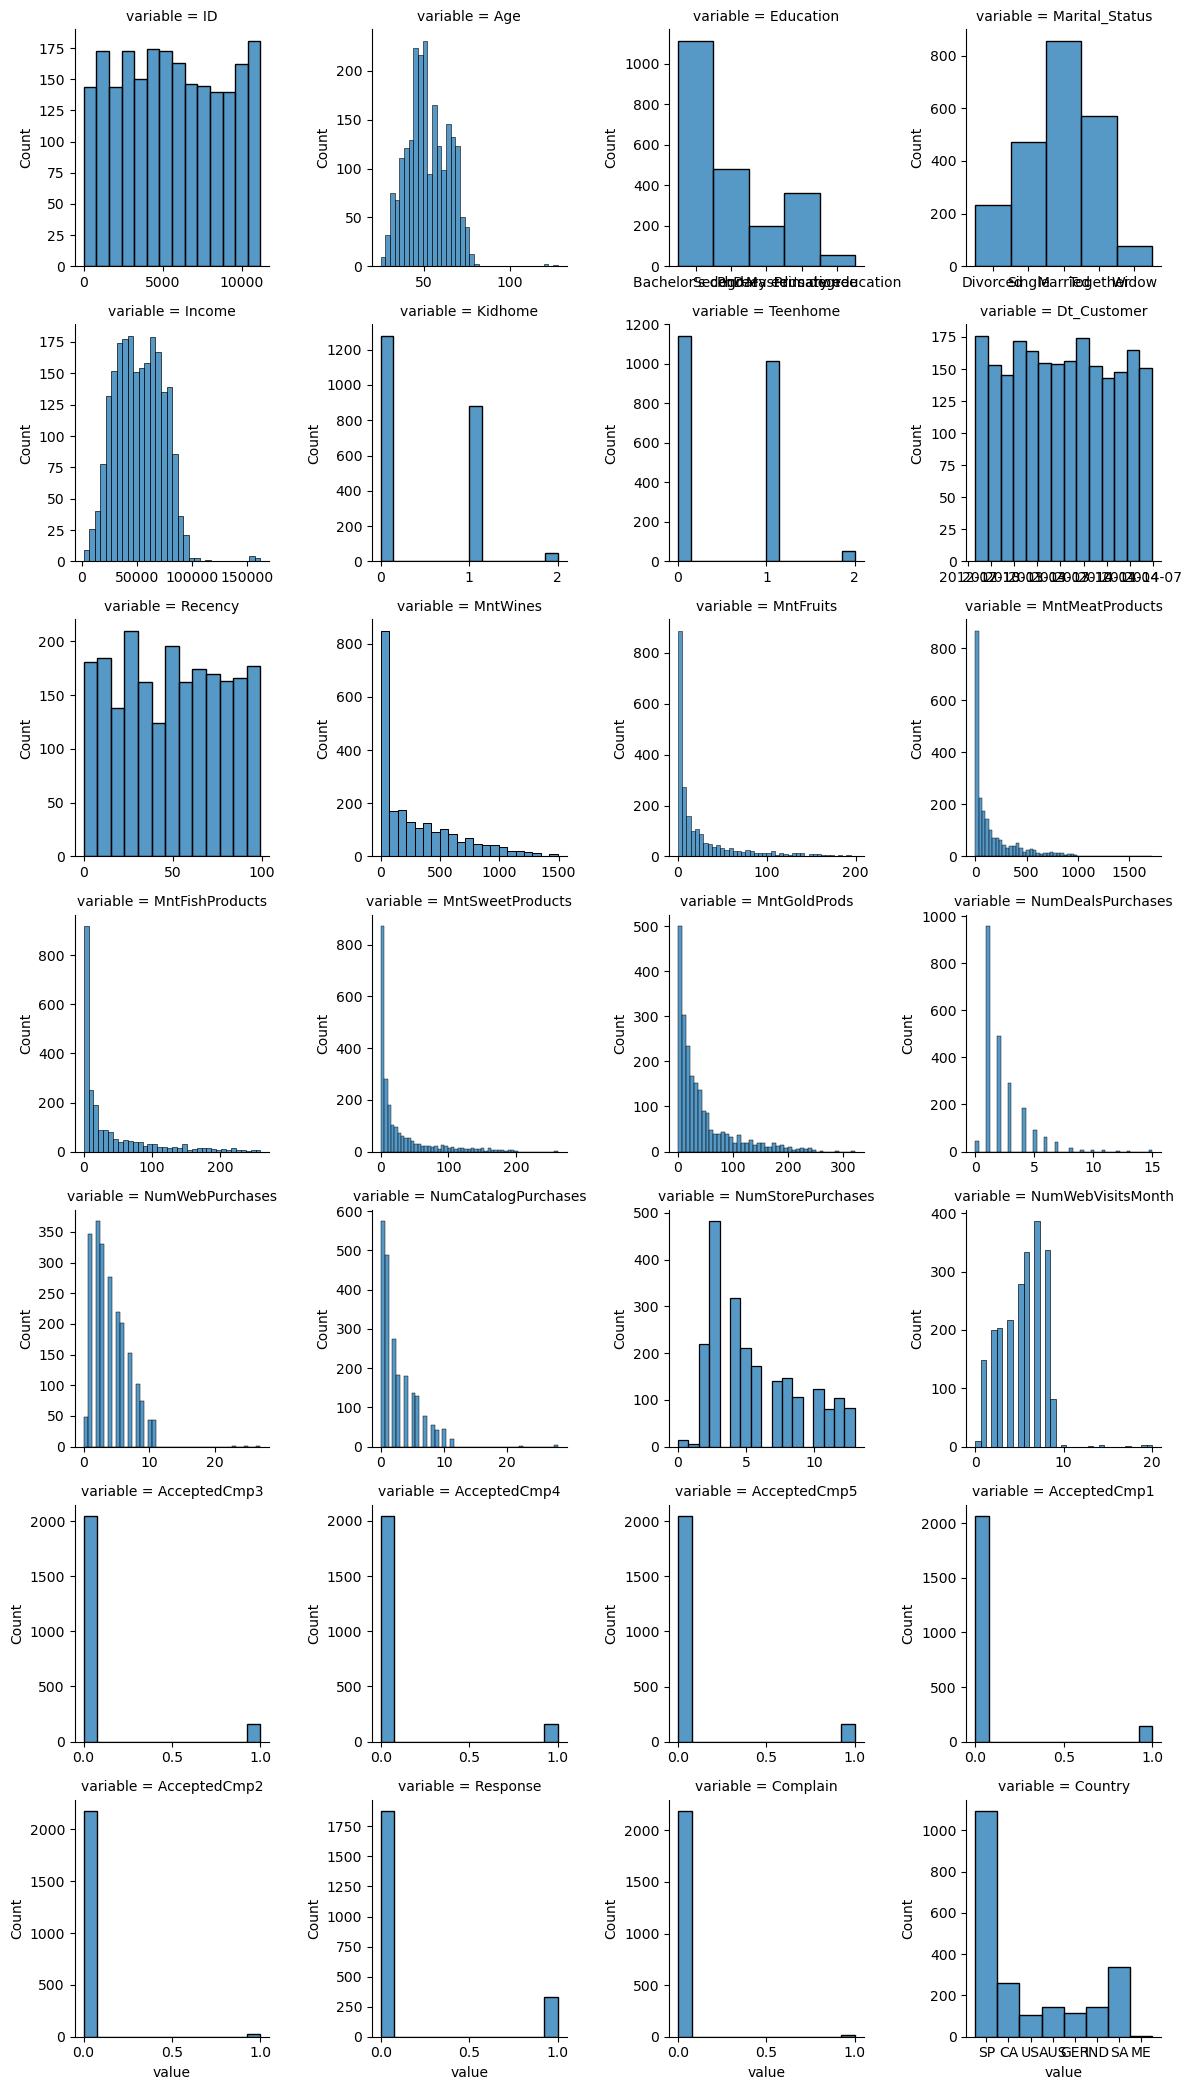

In [77]:
#Show all distributions of all the features
#in the dataset except Country, Education and Martial_Status becouse they are objects
dist = pd.DataFrame(data = dataset, columns = ['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'])
nd = pd.melt(dist, value_vars = dist)
n1 = sns.FacetGrid(nd, col = "variable", col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.histplot, "value")
plt.show()

In [24]:
dataset['Income'] = dataset['Income'].astype('float')

In [25]:
dataset["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: xlabel='Income', ylabel='Density'>

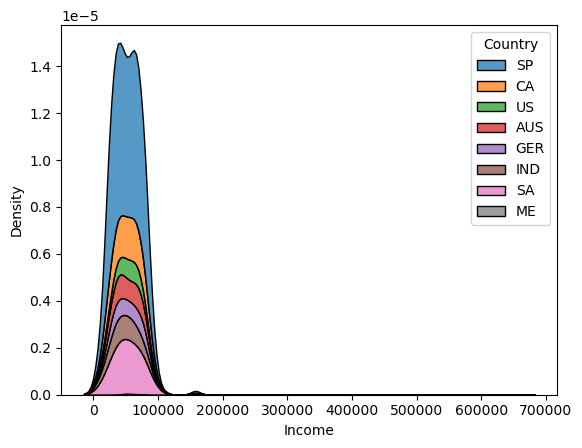

In [26]:
sns.kdeplot(data=dataset, x="Income", hue="Country", multiple="stack")

In [27]:
dataset[dataset['Income'] > 600000]

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,44,Bachelor's degree,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [28]:
dataset.drop(dataset[dataset['Income'] == 666666].index, inplace = True) #Drop one customer, who has 666666 $ income.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8584\3403624854.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Income'], kde=True, hist=True)


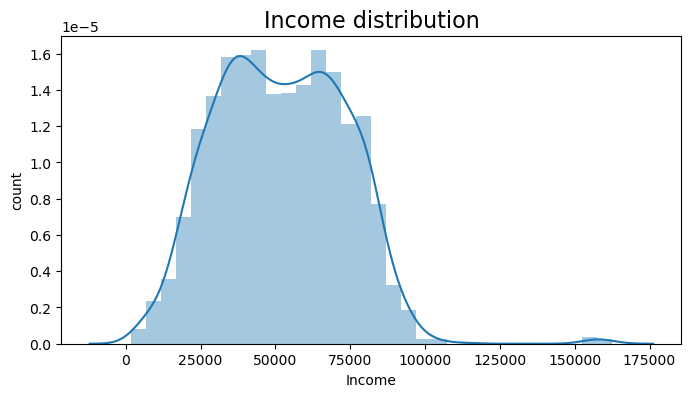

In [29]:
plt.figure(figsize=(8,4))
sns.distplot(dataset['Income'], kde=True, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Education_encoded'] = label_encoder.fit_transform(dataset['Education'])


In [31]:
numeric_columns = dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()


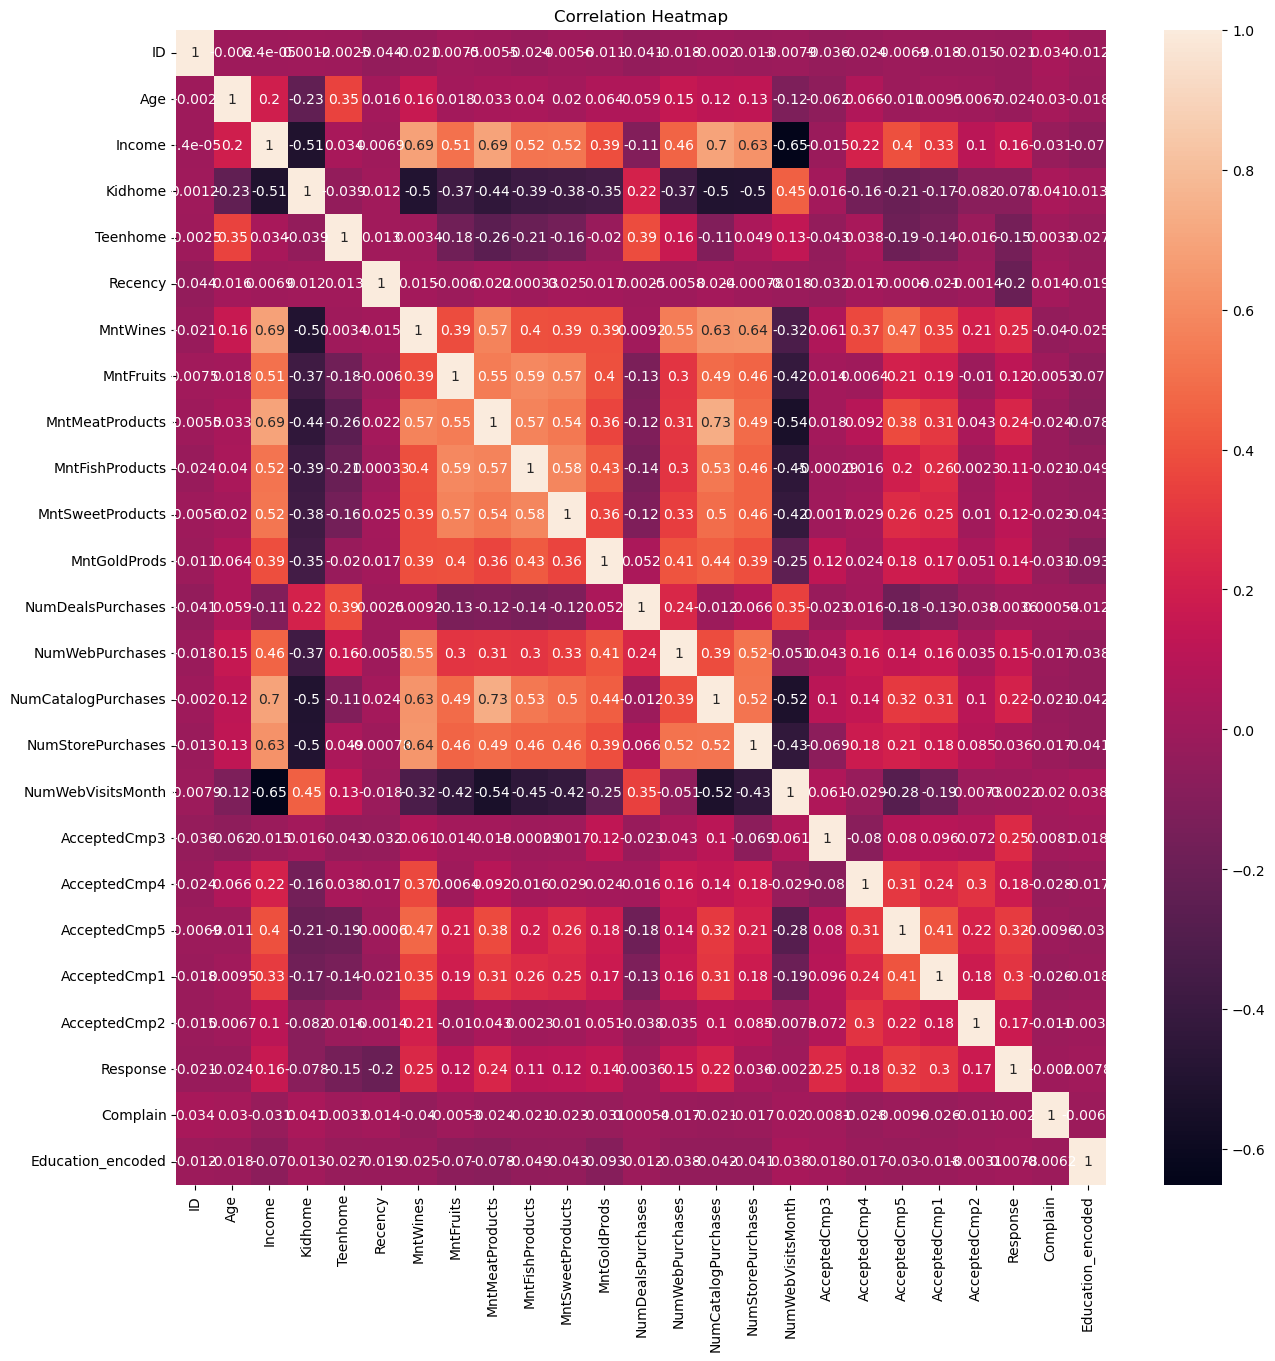

In [32]:
#Corellation Heatmap
numeric_columns = dataset.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 15))
plt.title(label="Correlation Heatmap")
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

# Statistical Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_8584\549078669.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['MntFishProducts'], kde=False, hist=True, bins=12)


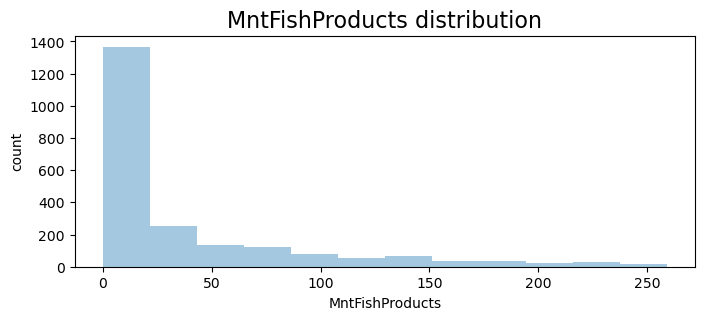

In [33]:
plt.figure(figsize=(8,3))
sns.distplot(dataset['MntFishProducts'], kde=False, hist=True, bins=12)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count');

C:\Users\Admin\AppData\Local\Temp\ipykernel_8584\2122769778.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['NumStorePurchases'], kde = False, hist=True, bins=12)


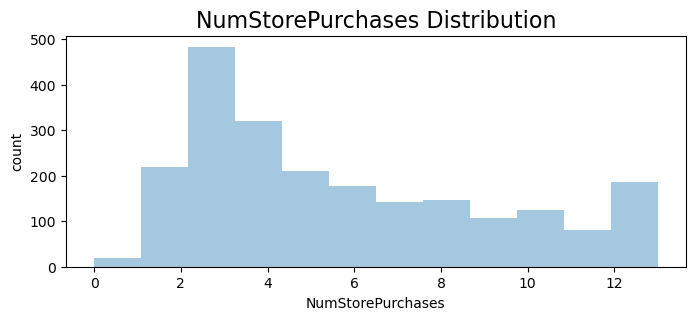

In [34]:
plt.figure(figsize=(8,3))
sns.distplot(dataset['NumStorePurchases'], kde = False, hist=True, bins=12)
plt.title('NumStorePurchases Distribution',size = 16)
plt.ylabel('count');

In [35]:
print("Total categories in the feature Education:\n\n") 
print(dataset["Education"].value_counts())

Total categories in the feature Education:


Education
Bachelor's degree      1115
PhD                     481
Master's degree         365
Secondary education     200
Primary education        54
Name: count, dtype: int64


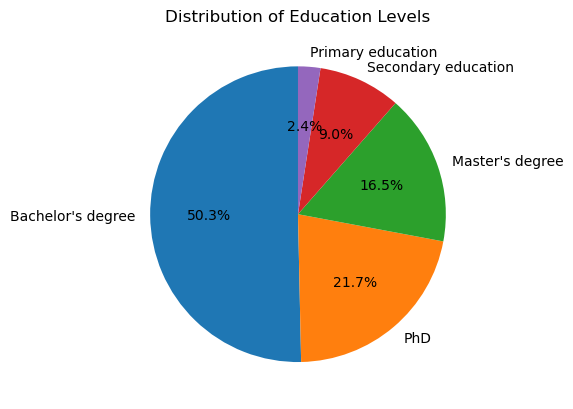

In [36]:
education_counts = dataset['Education'].value_counts()

plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Education Levels')
plt.show()

In [37]:
print("Total categories in the feature Marital_Status:\n")
print(dataset["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:

Marital_Status
Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64 



In [38]:
dataset.drop(dataset[dataset['Marital_Status'] == "YOLO"].index, inplace = True)
dataset.drop(dataset[dataset['Marital_Status'] == "Absurd"].index, inplace = True)
dataset.drop(dataset[dataset['Marital_Status'] == "Alone"].index, inplace = True)

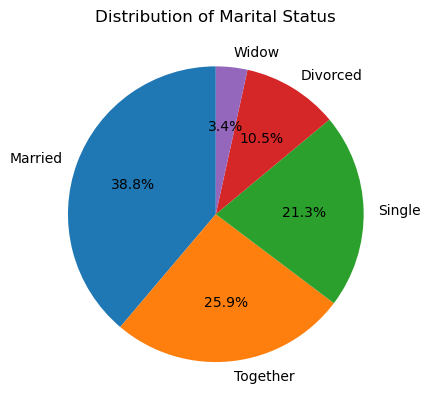

In [39]:
marital_status_counts = dataset['Marital_Status'].value_counts()

labels = marital_status_counts.index
sizes = marital_status_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Marital Status')
plt.show()

In [40]:
dataset["Dt_Customer"][dataset["Response"] == 1].dt.month.value_counts()
 #Count month when customers enroll with the company

Dt_Customer
8     46
9     41
10    37
11    33
1     30
2     28
3     26
5     23
4     22
12    17
6     16
7     11
Name: count, dtype: int64

In [41]:
dataset

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_encoded
0,1826,51,Bachelor's degree,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,60,Bachelor's degree,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,63,Bachelor's degree,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,0
3,1386,54,Bachelor's degree,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,0
4,5371,32,Bachelor's degree,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,45,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,0,US,2
2236,5263,44,Secondary education,Married,31056.0,1,0,2013-01-22,99,5,...,8,0,0,0,0,0,0,0,SP,4
2237,22,45,Bachelor's degree,Divorced,46310.0,1,0,2012-12-03,99,185,...,8,0,0,0,0,0,0,0,SP,0
2238,528,43,Bachelor's degree,Married,65819.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,0,IND,0


In [42]:
dataset["Dt_Customer"][dataset["Response"] == 1].dt.weekday.value_counts() 
#Count days of week when customers enroll with the compan

Dt_Customer
0    58
2    54
4    51
1    50
5    46
3    41
6    30
Name: count, dtype: int64

Text(0.5, 1.0, 'Education wise Income Comparison')

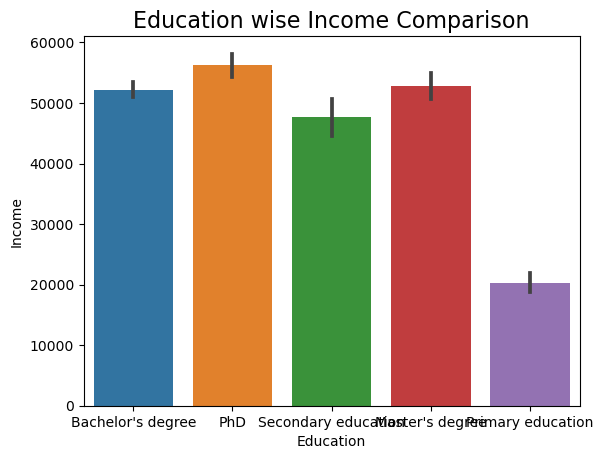

In [43]:
sns.barplot(x=dataset["Education"],y=dataset["Income"])
plt.title('Education wise Income Comparison',size = 16)

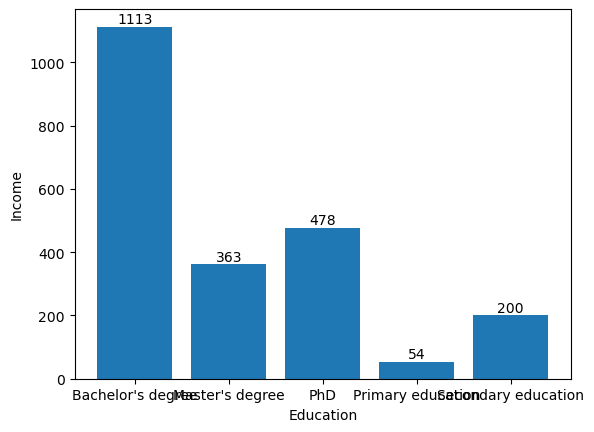

In [44]:
plot = plt.bar(dataset.groupby(by = "Education").count()["ID"].index.to_list(),
                dataset.groupby(by = "Education").count()["ID"].to_list())

for value in plot:  
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

plt.xlabel("Education")  
plt.ylabel("Income")
plt.rcParams["figure.figsize"] = (10,6) 
plt.show()

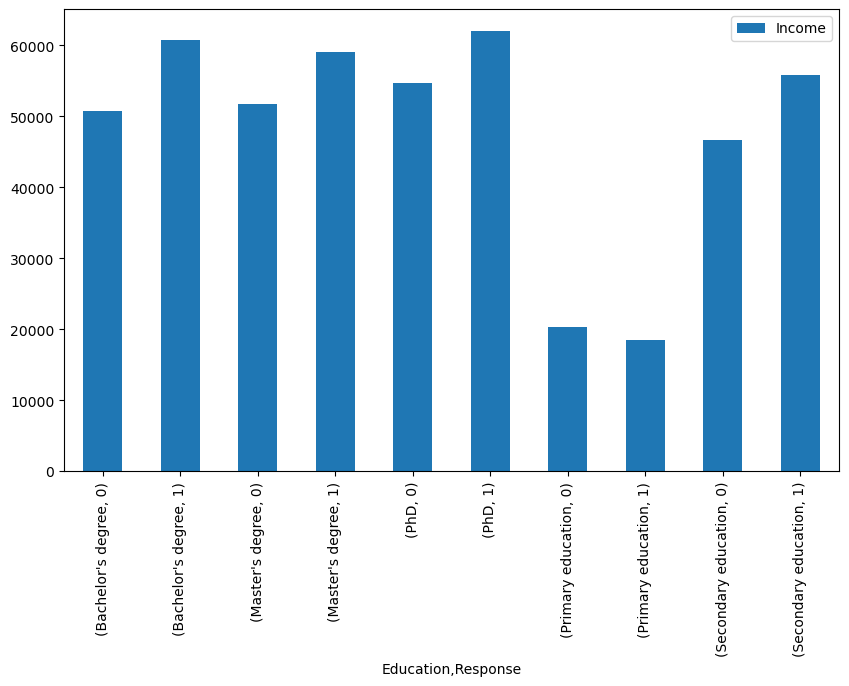

In [45]:
dataset.pivot_table(["Income"], ["Education","Response"], aggfunc="mean").plot.bar()
plt.show()

In [46]:
print("Total Categories in features Countries:\n")
print(dataset["Country"].value_counts(), "\n")

Total Categories in features Countries:

Country
SP     1093
SA      336
CA      261
AUS     146
IND     146
GER     116
US      107
ME        3
Name: count, dtype: int64 



<Axes: ylabel='Country'>

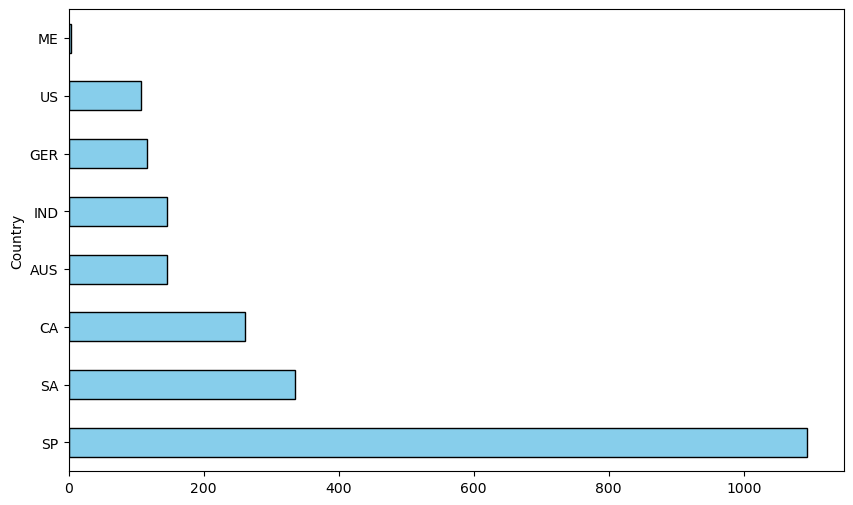

In [47]:
dataset['Country'].value_counts().plot(kind='barh', color='skyblue', edgecolor=(0,0,0))

In [48]:
dataset["Marital_Status"][dataset["Response"] == 1].value_counts() 
#Count Marital_Status of customers of those who accepted last campaign

Marital_Status
Single      106
Married      98
Together     60
Divorced     48
Widow        18
Name: count, dtype: int64

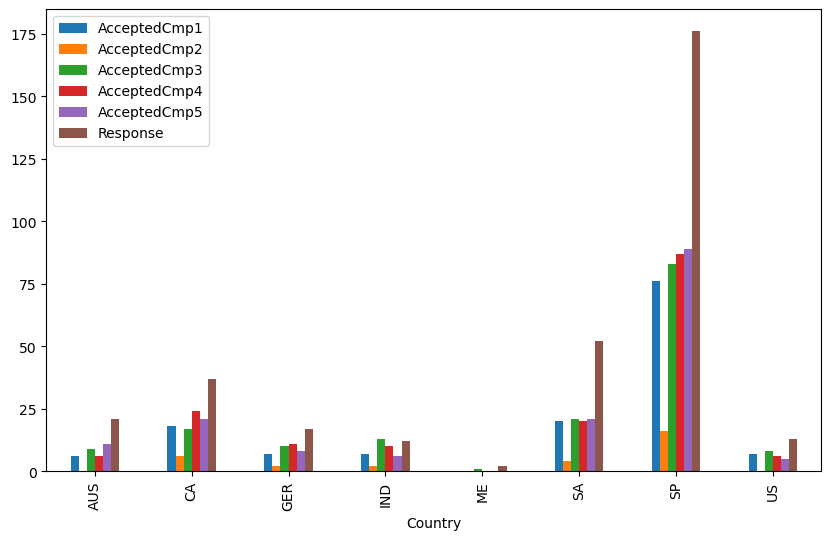

In [50]:
dataset.pivot_table(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], ["Country"], aggfunc="sum").plot.bar()
plt.show()

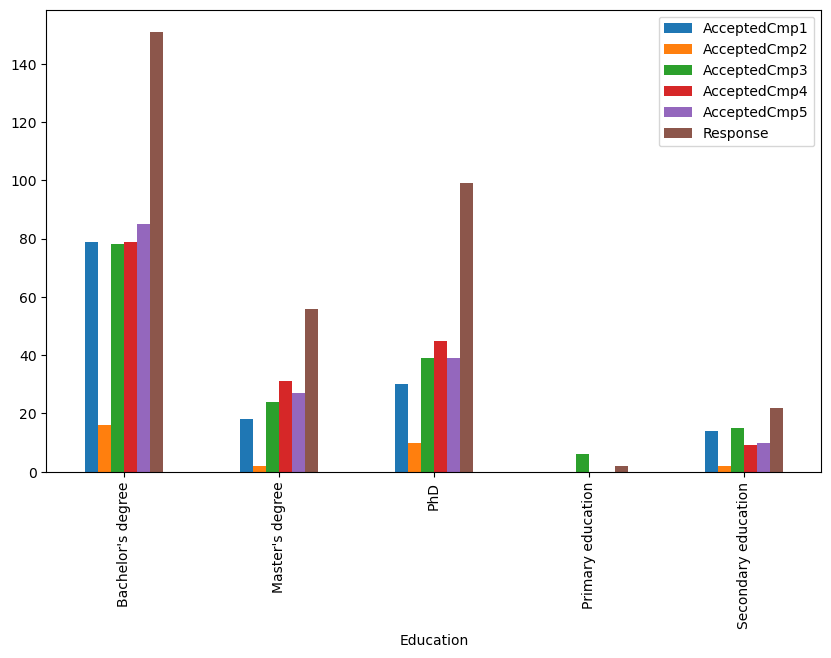

In [51]:
dataset.pivot_table(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], ["Education"], aggfunc="sum").plot.bar()
plt.show()

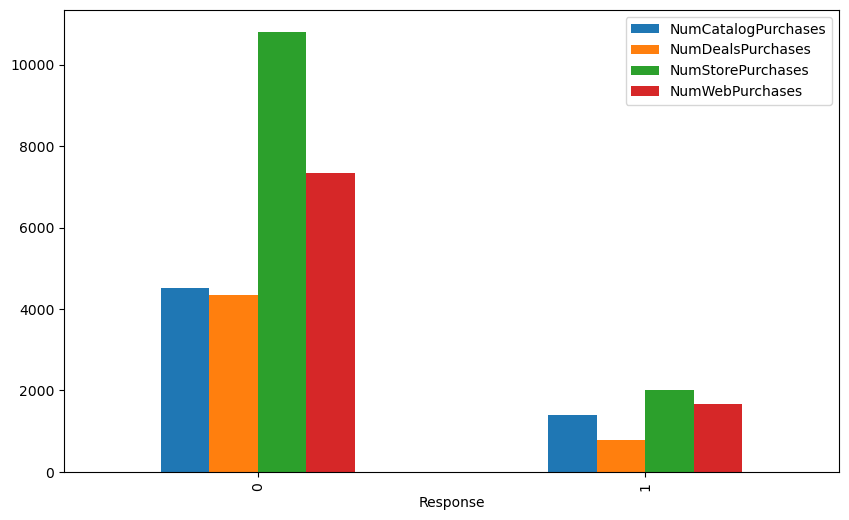

In [52]:
dataset.pivot_table(["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"], ["Response"], aggfunc="sum").plot.bar()
plt.show()

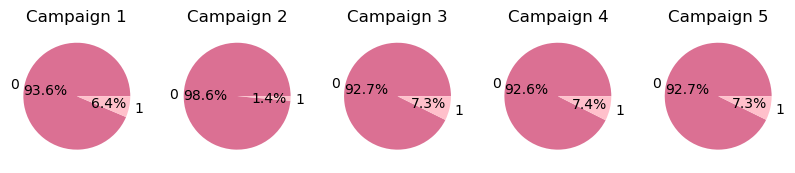

In [53]:
fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(10,10))
# 1,5 denotes 1 row, 5 columns 

colors= 'palevioletred', 'pink'

labels = dataset['AcceptedCmp1'].unique()
values =  dataset['AcceptedCmp1'].value_counts()
ax1.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') 

labels = dataset['AcceptedCmp2'].unique()
values = dataset['AcceptedCmp2'].value_counts()
ax2.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') 

labels = dataset['AcceptedCmp3'].unique()
values = dataset['AcceptedCmp3'].value_counts()
ax3.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

labels = dataset['AcceptedCmp4'].unique()
values = dataset['AcceptedCmp4'].value_counts()
ax4.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') 

labels = dataset['AcceptedCmp5'].unique()
values = dataset['AcceptedCmp5'].value_counts()
ax5.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') 

ax1.set(aspect="equal", title='Campaign 1')
ax2.set(aspect="equal", title='Campaign 2')
ax3.set(aspect="equal", title='Campaign 3')
ax4.set(aspect="equal", title='Campaign 4')
ax5.set(aspect="equal", title='Campaign 5')
plt.show()

In [55]:
# list of cols with binary responses
binary_cols = [col for col in dataset.columns if 'Accepted' in col] + ['Response', 'Complain']
binary_cols

# list of cols for spending 
mnt_cols = [col for col in dataset.columns if 'Mnt' in col]
mnt_cols

# list of cols for channels
channel_cols = [col for col in dataset.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']
channel_cols

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'TotalPurchases',
 'TotalCampaignsAcc']

In [56]:
dataset.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_encoded
0,1826,51,Bachelor's degree,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,60,Bachelor's degree,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,63,Bachelor's degree,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,0
3,1386,54,Bachelor's degree,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,0
4,5371,32,Bachelor's degree,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,0


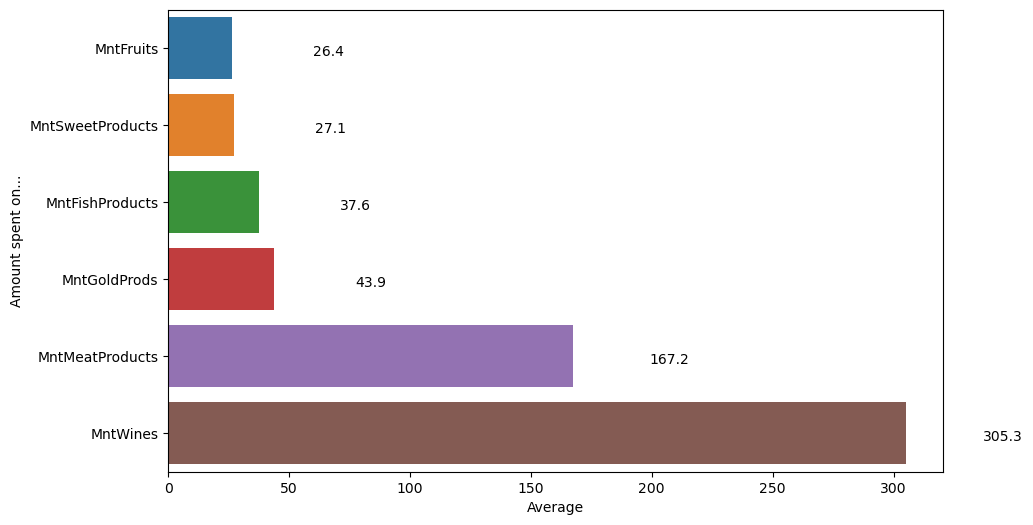

In [58]:
spending = pd.DataFrame(round(dataset[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

ax = sns.barplot(x='Average', y='index', data=spending)
plt.ylabel('Amount spent on...')

for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

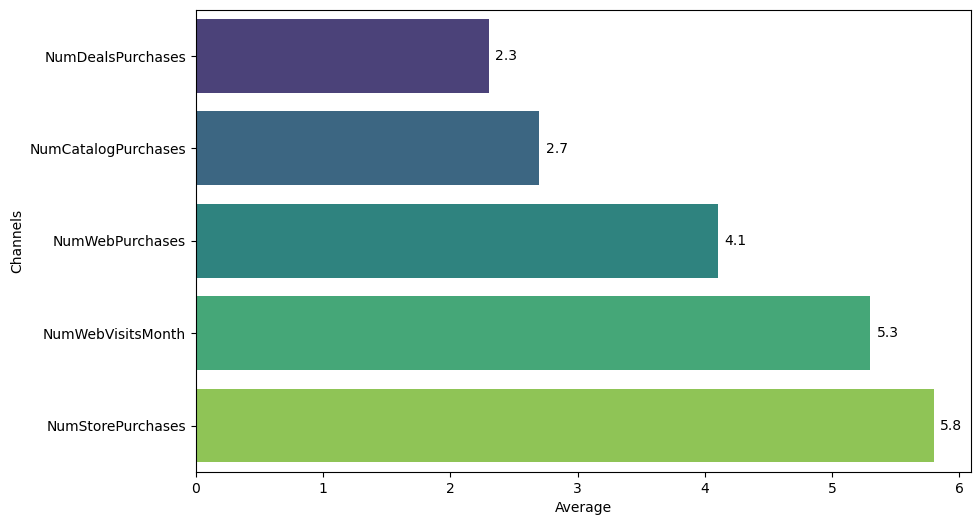

In [59]:
valid_channel_cols = [col for col in channel_cols if col in dataset.columns]

if valid_channel_cols:
    channels = pd.DataFrame(round(dataset[valid_channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

    ax = sns.barplot(x='Average', y='index', data=channels, palette='viridis') 
    plt.xlabel('Average')
    plt.ylabel('Channels')

    for p, q in zip(ax.patches, channels['Average']):
        ax.text(x=q + 0.05,  
                y=p.get_y() + p.get_height() / 2,
                s=str(q),
                ha="left",  
                va="center")  

    plt.show()
else:
    print("No valid channel columns found in the dataset.")


<Axes: ylabel='Frequency'>

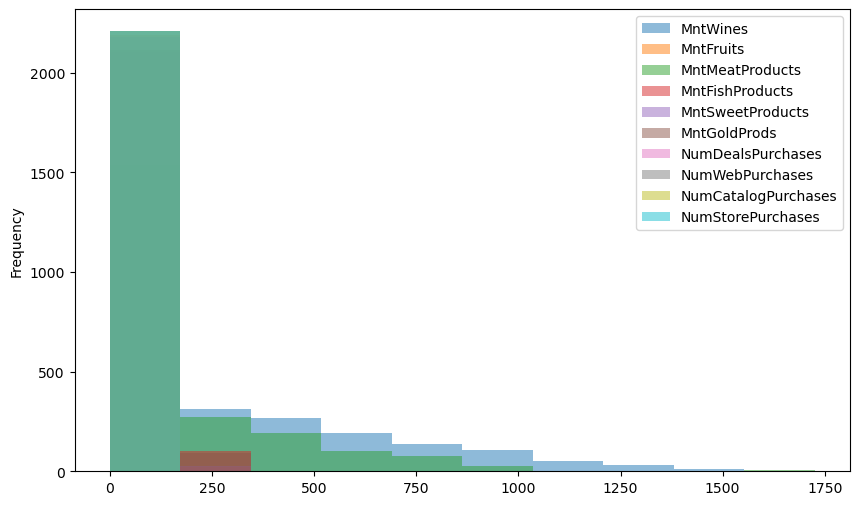

In [60]:
countries = dataset[['Country', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases' ]]

countries.plot.hist(alpha=0.5)

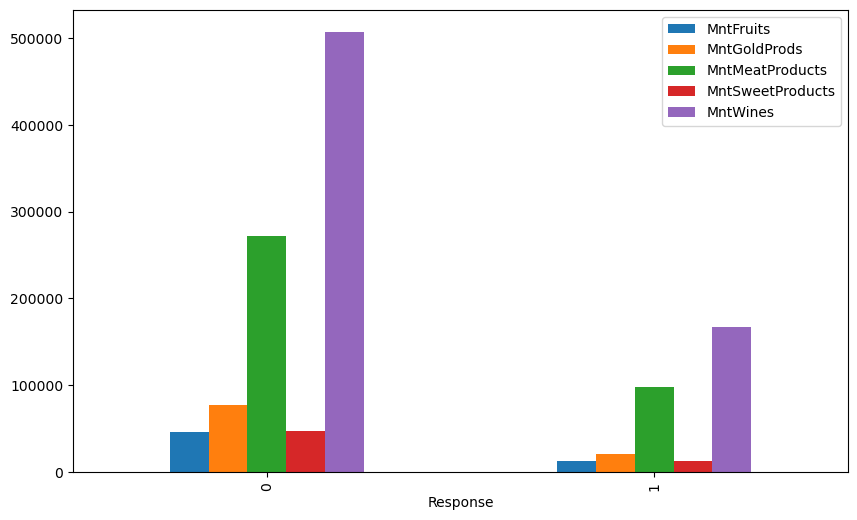

In [62]:
dataset.pivot_table(["MntWines","MntFruits","MntMeatProducts","MntSweetProducts","MntGoldProds"], ["Response"], aggfunc="sum").plot.bar()
plt.show()

In [63]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
dataset['TotalAmountSpent'] = dataset[spending_columns].sum(axis=1)
dataset['TotalAmountSpent'] 

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: TotalAmountSpent, Length: 2208, dtype: int64

In [79]:
dataset.pivot_table(["MntWines","MntFruits","MntMeatProducts","MntSweetProducts","MntGoldProds"], ["Response"], aggfunc="sum")

,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Response,,,,,
0,45675,76752,271600,47095,507602
1,12529,20090,97641,12712,166563


In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features_for_clustering = ['Age', 'NumDealsPurchases', 'TotalAmountSpent']

# Extract the relevant features for clustering
clustering_data = dataset[features_for_clustering].copy()

# Standardize the features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Specify the number of clusters
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
dataset['Segment'] = kmeans.fit_predict(clustering_data_scaled)
print(dataset['Segment'])


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0       2
1       1
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    1
2238    2
2239    2
Name: Segment, Length: 2208, dtype: int32


<Axes: >

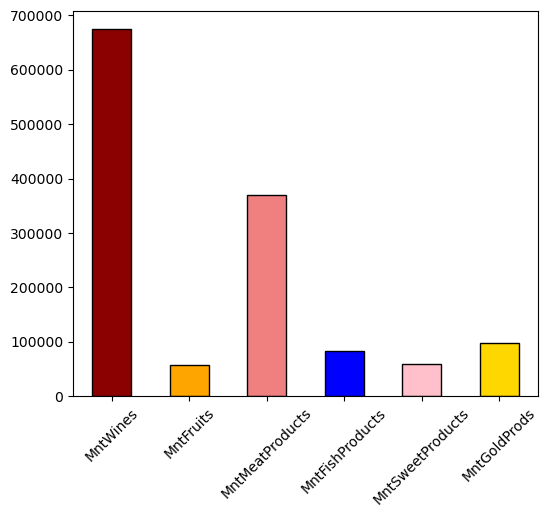

In [66]:
#Question1- Which products are performing best?
colors='darkred','orange', 'lightcoral', 'blue', 'pink', 'gold'
products = dataset[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts' ,'MntGoldProds']]
products.sum().plot(kind='bar',figsize=(6,5),edgecolor=(0,0,0), color=colors, rot=45)

<Axes: >

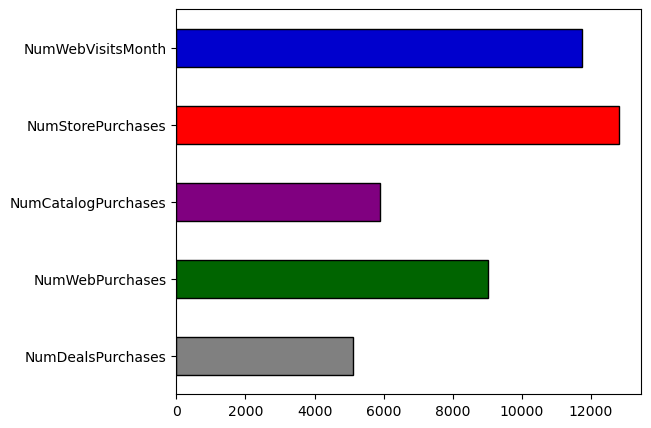

In [69]:
#Question2- Which channels are underperforming?
channels = dataset[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
colors='gray','darkgreen', 'purple', 'Red', 'mediumblue'
channels.sum().plot(kind='barh',figsize=(6,5),edgecolor=(0,0,0), color=colors)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8584\3355826899.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')


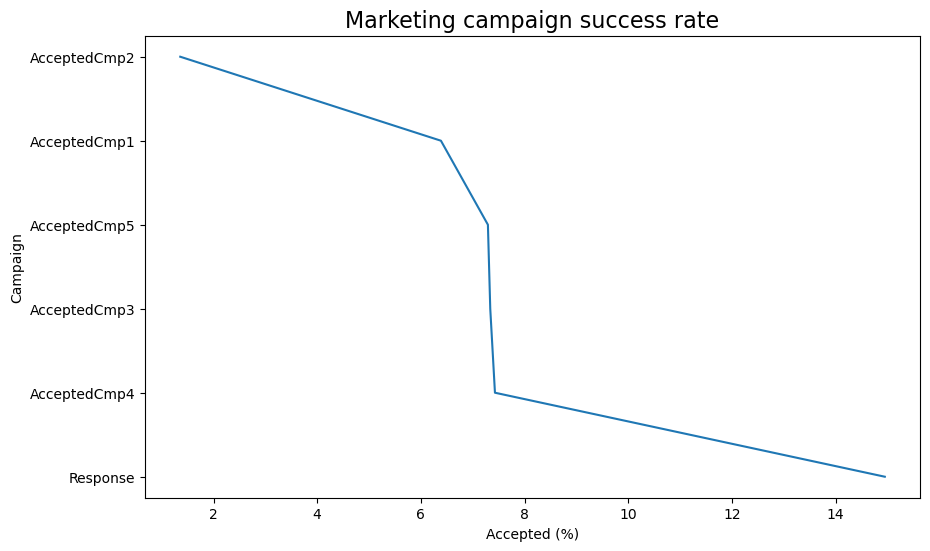

In [83]:
#Question3- Which marketing campaign is most successful?
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(dataset[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.lineplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

<Axes: xlabel='Country', ylabel='Count'>

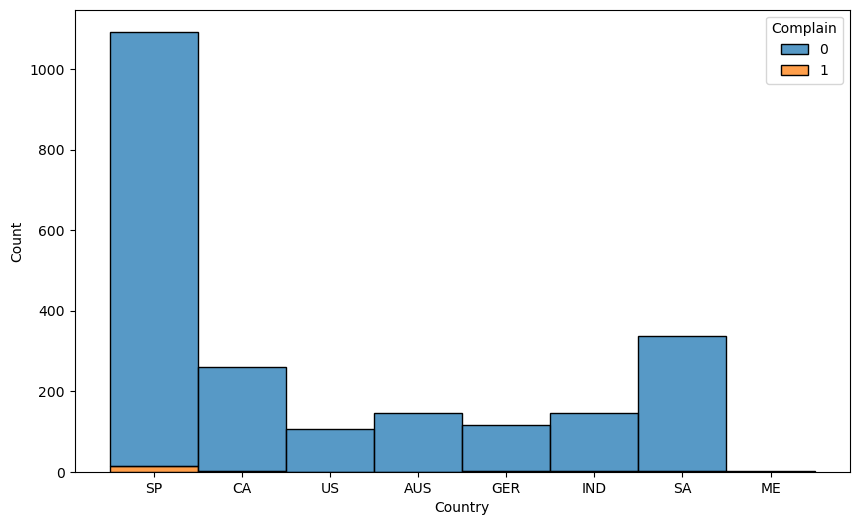

In [84]:
#Question4- Which regions are performing best?
sns.histplot(data=dataset, x="Country", hue="Complain", multiple="stack")

In [78]:
#Question5- which customer segment purchase more?
segment_column = 'Segment'
purchase_metric_column = 'TotalAmountSpent'
segment_purchases = dataset.groupby(segment_column)[purchase_metric_column].sum()
top_segment = segment_purchases.idxmax()
print(segment_purchases)

Segment
0    215449
1    206274
2    919491
Name: TotalAmountSpent, dtype: int64


In [70]:
#Question6- What does the costumer segment which accepted the last marketing campaign look like?
last_campaign_accepted = dataset[dataset['AcceptedCmp5'] == 1]
segment_stats = last_campaign_accepted.describe()
segment_stats



,ID,Age,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Education_encoded,TotalAmountSpent,Segment
count,161.000000,161.000000,161.000000,161.000000,161.000000,161,161.000000,161.000000,161.000000,161.000000,...,161.000000,161.00000,161.0,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,5492.801242,51.875776,82372.136646,0.049689,0.136646,2013-07-15 07:27:12.298136576,48.906832,876.267081,56.229814,470.031056,...,0.149068,0.36646,1.0,0.416149,0.105590,0.559006,0.006211,0.900621,1618.919255,1.913043
min,175.000000,26.000000,51563.000000,0.000000,0.000000,2012-08-01 00:00:00,1.000000,152.000000,0.000000,48.000000,...,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,523.000000,0.000000
25%,3009.000000,39.000000,77457.000000,0.000000,0.000000,2013-02-10 00:00:00,23.000000,675.000000,21.000000,272.000000,...,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,2.000000
50%,5341.000000,50.000000,82497.000000,0.000000,0.000000,2013-07-04 00:00:00,52.000000,901.000000,33.000000,445.000000,...,0.000000,0.00000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1672.000000,2.000000
75%,7962.000000,64.000000,88097.000000,0.000000,0.000000,2014-01-15 00:00:00,74.000000,1111.000000,80.000000,694.000000,...,0.000000,1.00000,1.0,1.000000,0.000000,1.000000,0.000000,2.000000,1910.000000,2.000000
max,11101.000000,122.000000,105471.000000,1.000000,2.000000,2014-06-23 00:00:00,99.000000,1493.000000,185.000000,968.000000,...,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,1.000000,4.000000,2525.000000,2.000000
std,3113.575663,14.801925,8797.599247,0.217981,0.395236,NaN,29.344463,331.830694,49.823344,257.846549,...,0.357267,0.48334,0.0,0.494457,0.308271,0.498055,0.078811,1.152199,419.841860,0.342624


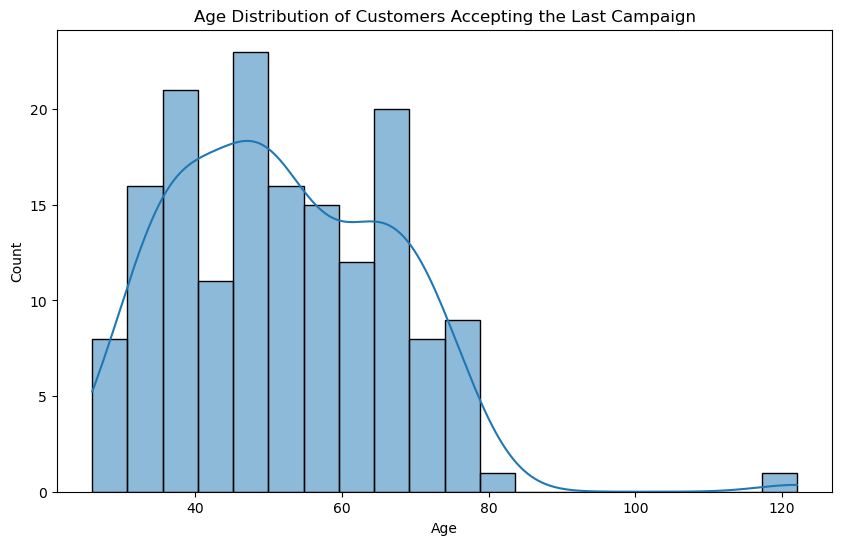

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(last_campaign_accepted['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers Accepting the Last Campaign')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

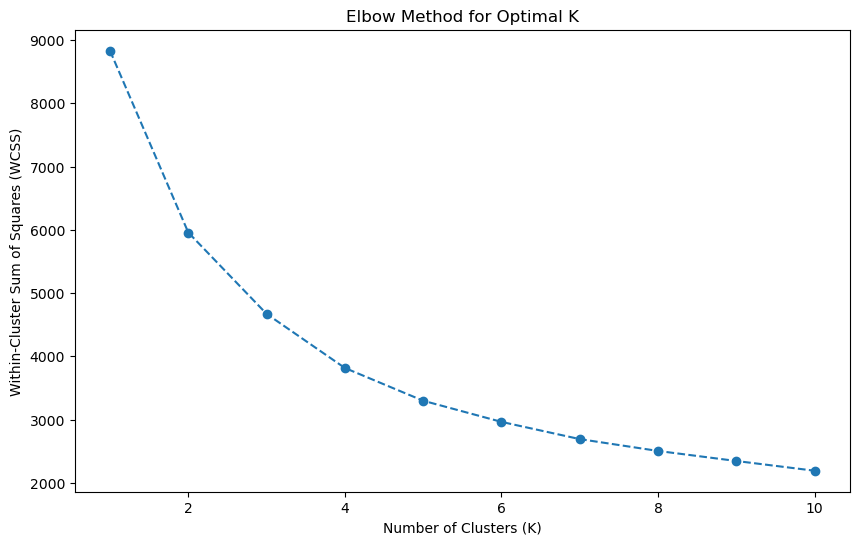

In [72]:
#Dataset clustering and segmentation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features_for_clustering = dataset[['Age', 'Income', 'MntWines', 'NumDealsPurchases']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

 



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


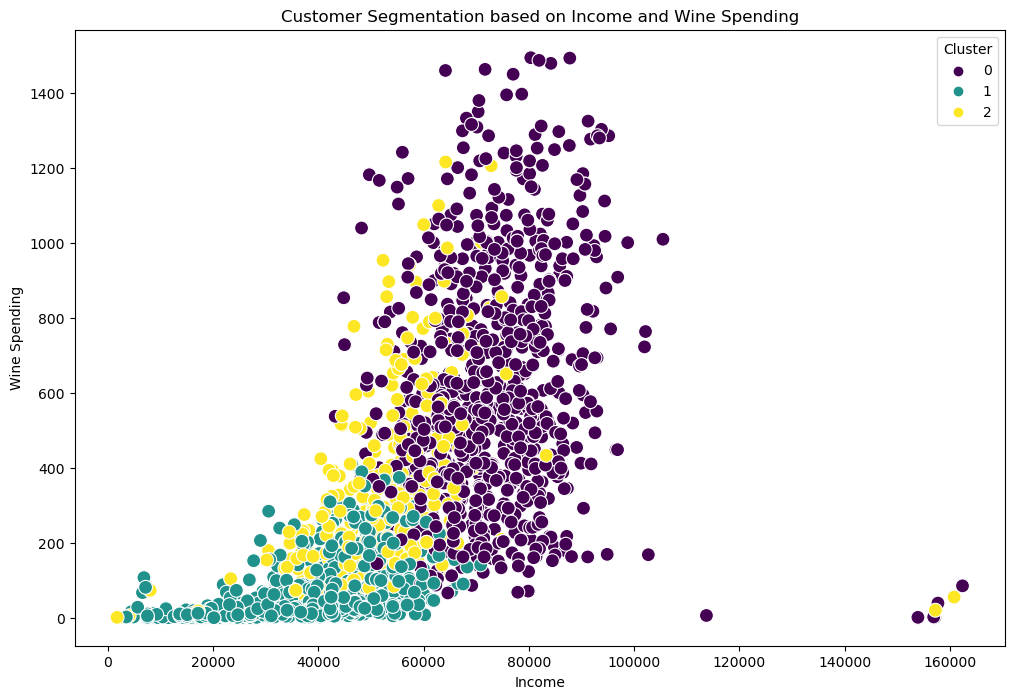

In [73]:
# Apply K-means clustering with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
dataset['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='MntWines', hue='Cluster', data=dataset, palette='viridis', s=100)
plt.title('Customer Segmentation based on Income and Wine Spending')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.show()
